In [1]:
import keras
from keras.models import Sequential, Model, load_model
from keras.layers.core import Dense, Flatten
from keras.applications.resnet import ResNet50 
from keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint
import keras.backend as K
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import cv2
import h5py
import matplotlib.pyplot as plt
from google.colab import drive
import pandas as pd
# to continue using tf 1.x
# Restart runtime using 'Runtime' -> 'Restart runtime...'
#%tensorflow_version 1.x 
# v2 - 50 epochs - gross oerfitting
# v3 - 100 epochs - gross overfitting

Using TensorFlow backend.


In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%cd "drive/My Drive/BTP"

/content/drive/My Drive/BTP


In [0]:
from metrics_v2 import *

In [0]:
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'resnet50_v3_adam.h5'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

model_path = os.path.join(save_dir, model_name)

In [0]:
from tensorflow.python.client import device_lib
from keras import backend
assert len(backend.tensorflow_backend._get_available_gpus()) > 0
assert 'GPU' in str(device_lib.list_local_devices())

In [0]:
K.clear_session()

In [0]:
img_width = 128
img_height = 128
channels = 3

In [0]:
base_model = ResNet50(include_top=False, weights='imagenet', input_tensor=None, input_shape=(img_width, img_height, channels), pooling='avg')





94773248/94765736 [==============================] - 8s 0us/step




In [0]:
for layer in base_model.layers[:-11]:
  layer.trainable = False
layers = [(layer, layer.name, layer.trainable) for layer in base_model.layers]
layer_info = pd.DataFrame(layers, columns=['Layer type', 'Layer name', 'Layer trainable'])
pd.set_option('display.max_rows', layer_info.shape[0]+1)
layer_info

,Layer type,Layer name,Layer trainable
0,<keras.engine.input_layer.InputLayer object at...,input_1,False
1,<keras.layers.convolutional.ZeroPadding2D obje...,conv1_pad,False
2,<keras.layers.convolutional.Conv2D object at 0...,conv1_conv,False
3,<keras.layers.normalization.BatchNormalization...,conv1_bn,False
4,<keras.layers.core.Activation object at 0x7f1b...,conv1_relu,False
5,<keras.layers.convolutional.ZeroPadding2D obje...,pool1_pad,False
6,<keras.layers.pooling.MaxPooling2D object at 0...,pool1_pool,False
7,<keras.layers.convolutional.Conv2D object at 0...,conv2_block1_1_conv,False
8,<keras.layers.normalization.BatchNormalization...,conv2_block1_1_bn,False
9,<keras.layers.core.Activation object at 0x7f1b...,conv2_block1_1_relu,False


In [0]:
model = Sequential()
model.add(base_model)
#model.add(Flatten())
model.add(Dense(6))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 12294     
Total params: 23,600,006
Trainable params: 4,477,958
Non-trainable params: 19,122,048
_________________________________________________________________


In [0]:
y_file = 'train_GT.csv'
y_train = np.loadtxt(y_file, dtype=np.float32)

x_file = 'train_set.hdf5'
h5_reader = h5py.File(x_file, 'r')
print(h5_reader.keys())
x_train = h5_reader['train_img']
x_train = np.array(x_train)
h5_reader.close()

KeysView(<HDF5 file "train_set.hdf5" (mode r)>)


Shape of training set :  (26399, 128, 128, 3)
Shape of training labels :  (26399, 6)
<class 'numpy.ndarray'>
float32


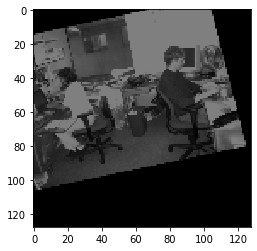

In [0]:
print("Shape of training set : ", x_train.shape)
x_train = x_train.astype('float32', copy=False)
x_train /= 255

print('Shape of training labels : ', y_train.shape)
print(type(x_train[26200]))
print(x_train[26200].dtype)
plt.imshow(x_train[26200])

In [0]:
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#sgd = SGD()
model.compile(optimizer=adam, loss=euclidean_loss(beta=beta), metrics=[euclidean_dist, x_error, y_error, z_error])

In [0]:
img_gen = ImageDataGenerator()
img_gen.fit(x_train)

In [0]:
epochs = 100
batch_size = 32
steps_per_epoch = x_train.shape[0] // batch_size
print(steps_per_epoch)

824


In [0]:
model.fit_generator(img_gen.flow(x_train, y_train, batch_size = batch_size), verbose=1, steps_per_epoch=steps_per_epoch, epochs=epochs)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
824/824 [==============================] - 101s 123ms/step - loss: 2.3781 - euclidean_dist: 0.4263 - x_error: 0.3871 - y_error: 0.3606 - z_error: 0.3664
Epoch 2/100
824/824 [==============================] - 91s 110ms/step - loss: 1.3176 - euclidean_dist: 0.2543 - x_error: 0.2223 - y_error: 0.2282 - z_error: 0.2123
Epoch 3/100
824/824 [==============================] - 90s 110ms/step - loss: 0.9874 - euclidean_dist: 0.1813 - x_error: 0.1570 - y_error: 0.1671 - z_error: 0.1492
Epoch 4/100
824/824 [==============================] - 91s 110ms/step - loss: 0.6713 - euclidean_dist: 0.1211 - x_error: 0.1067 - y_error: 0.1097 - z_error: 0.0982
Epoch 5/100
824/824 [==============================] - 90s 110ms/step - loss: 0.5806 - euclidean_dist: 0.0963 - x_error: 0.0826 - y_error: 0.0843 - z_error: 0.0834
Epoch 6/100
824/824 [==============================] - 90s 110ms/step - loss: 0.545

In [0]:
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/drive/My Drive/BTP/saved_models/resnet50_v3_adam.h5 
